In [1]:
import numpy as np
import pandas as pd


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [5]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df_temp = df[['ID','Age','Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [7]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [9]:
df = df.drop(['ID'],axis=1)

In [10]:
mark_array=df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [11]:
kproto = KPrototypes(n_clusters=10,verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array,categorical=[0,1,3,5,6])

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 813, ncost: 163.3096418985562
Run: 1, iteration: 2/20, moves: 210, ncost: 162.489100242354
Run: 1, iteration: 3/20, moves: 80, ncost: 161.61582046749533
Run: 1, iteration: 4/20, moves: 69, ncost: 161.14532881465348
Run: 1, iteration: 5/20, moves: 58, ncost: 160.86139681838253
Run: 1, iteration: 6/20, moves: 14, ncost: 160.849793365375
Run: 1, iteration: 7/20, moves: 4, ncost: 160.84900170810567
Run: 1, iteration: 8/20, moves: 0, ncost: 160.84900170810567
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 601, ncost: 185.22604360672705
Run: 2, iteration: 2/20, moves: 172, ncost: 178.53515343591312
Run: 2, iteration: 3/20, moves: 52, ncost: 178.28212373907746
Run: 2, iteration: 4/20, moves: 43, ncost: 177.7729458667066
Run: 2, iteration: 5/20,

10

In [15]:
cluster_dict=[]
for c in clusters:
     cluster_dict.append(c)
        
        
df['cluster']=cluster_dict
df[['ID','Age','Income']]=df_temp

In [17]:
df[df['cluster']== 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
16,0,0,53,1,125550,1,0,0,100000017
23,0,0,44,1,134918,1,2,0,100000024
46,0,0,39,1,140182,1,0,0,100000047
77,0,0,51,1,155486,1,2,0,100000078
94,0,0,54,1,165230,1,2,0,100000095
109,0,1,35,1,140520,1,0,0,100000110
149,0,0,46,1,152383,1,2,0,100000150
150,0,0,42,1,119926,1,0,0,100000151
170,0,0,33,1,95445,1,0,0,100000171
173,0,0,33,1,108899,1,0,0,100000174


In [18]:
df1= df[df.cluster==0]

In [19]:
df1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
16,0,0,53,1,125550,1,0,0,100000017
23,0,0,44,1,134918,1,2,0,100000024
46,0,0,39,1,140182,1,0,0,100000047
77,0,0,51,1,155486,1,2,0,100000078
94,0,0,54,1,165230,1,2,0,100000095


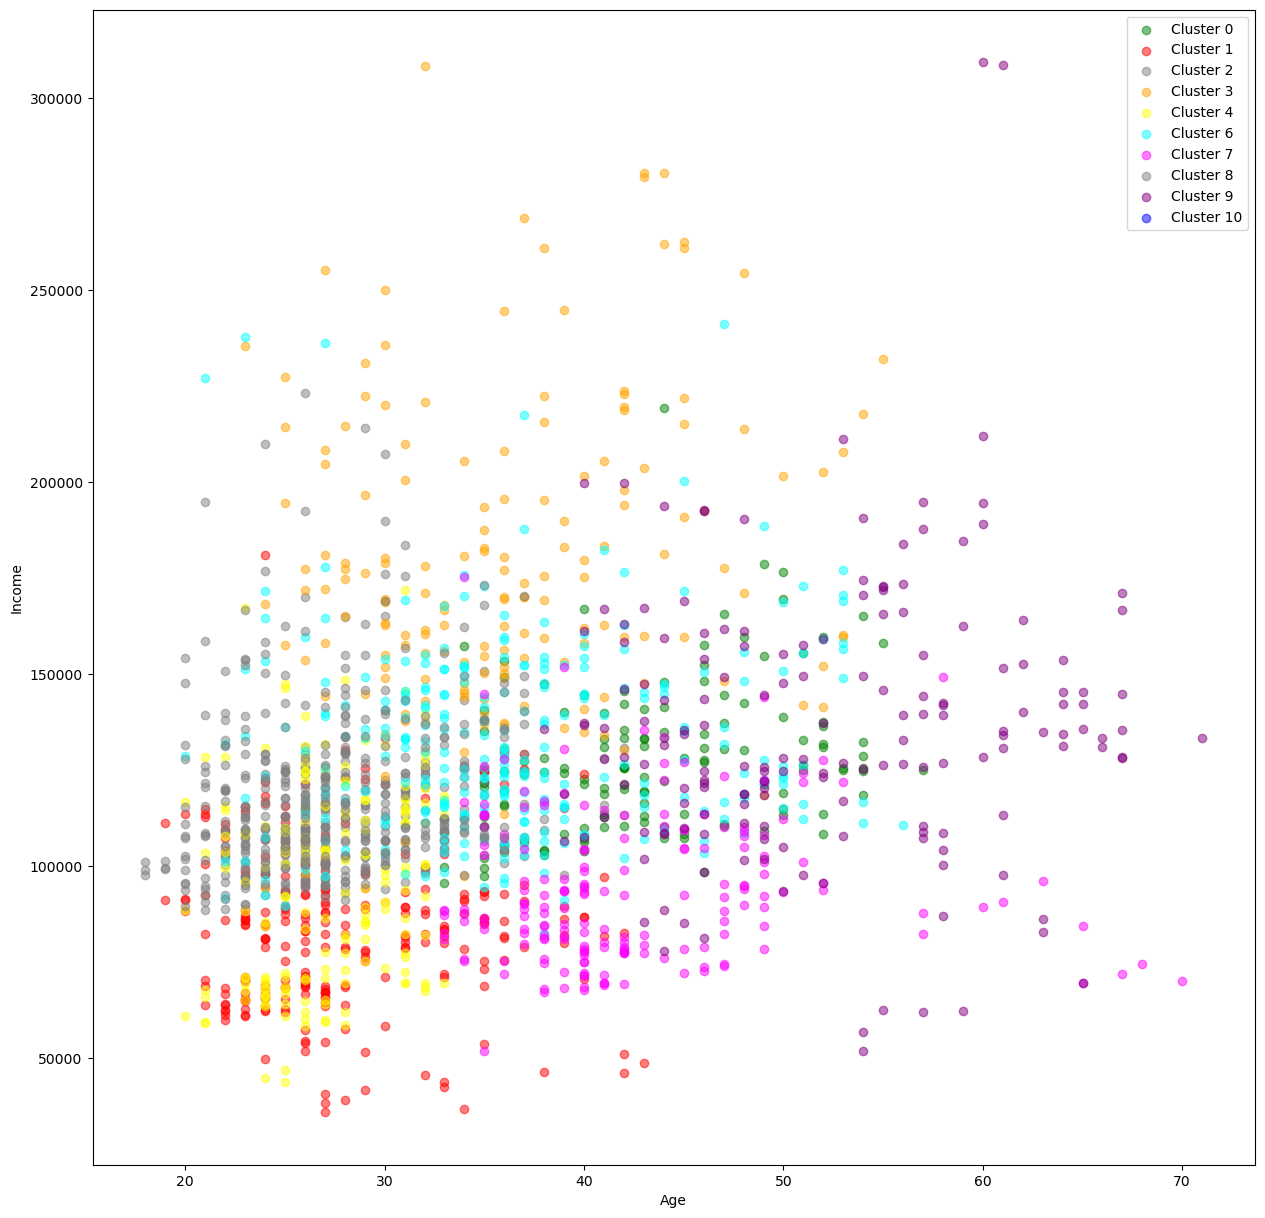

In [28]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]
df6 = df[df.cluster == 6]
df7 = df[df.cluster == 7]
df8 = df[df.cluster == 8]
df9 = df[df.cluster == 9]
df10 = df[df.cluster == 10]

plt.figure(figsize=(15, 15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'], color='green', alpha=0.5, label='Cluster 0')
plt.scatter(df2.Age, df2['Income'], color='red', alpha=0.5, label='Cluster 1')
plt.scatter(df3.Age, df3['Income'], color='gray', alpha=0.5, label='Cluster 2')
plt.scatter(df4.Age, df4['Income'], color='orange', alpha=0.5, label='Cluster 3')
plt.scatter(df5.Age, df5['Income'], color='yellow', alpha=0.5, label='Cluster 4')
plt.scatter(df6.Age, df6['Income'], color='cyan', alpha=0.5, label='Cluster 6')
plt.scatter(df7.Age, df7['Income'], color='magenta', alpha=0.5, label='Cluster 7')
plt.scatter(df8.Age, df8['Income'], color='gray', alpha=0.5, label='Cluster 8')
plt.scatter(df9.Age, df9['Income'], color='purple', alpha=0.5, label='Cluster 9')
plt.scatter(df10.Age, df10['Income'], color='blue', alpha=0.5, label='Cluster 10')

plt.legend()
plt.show()


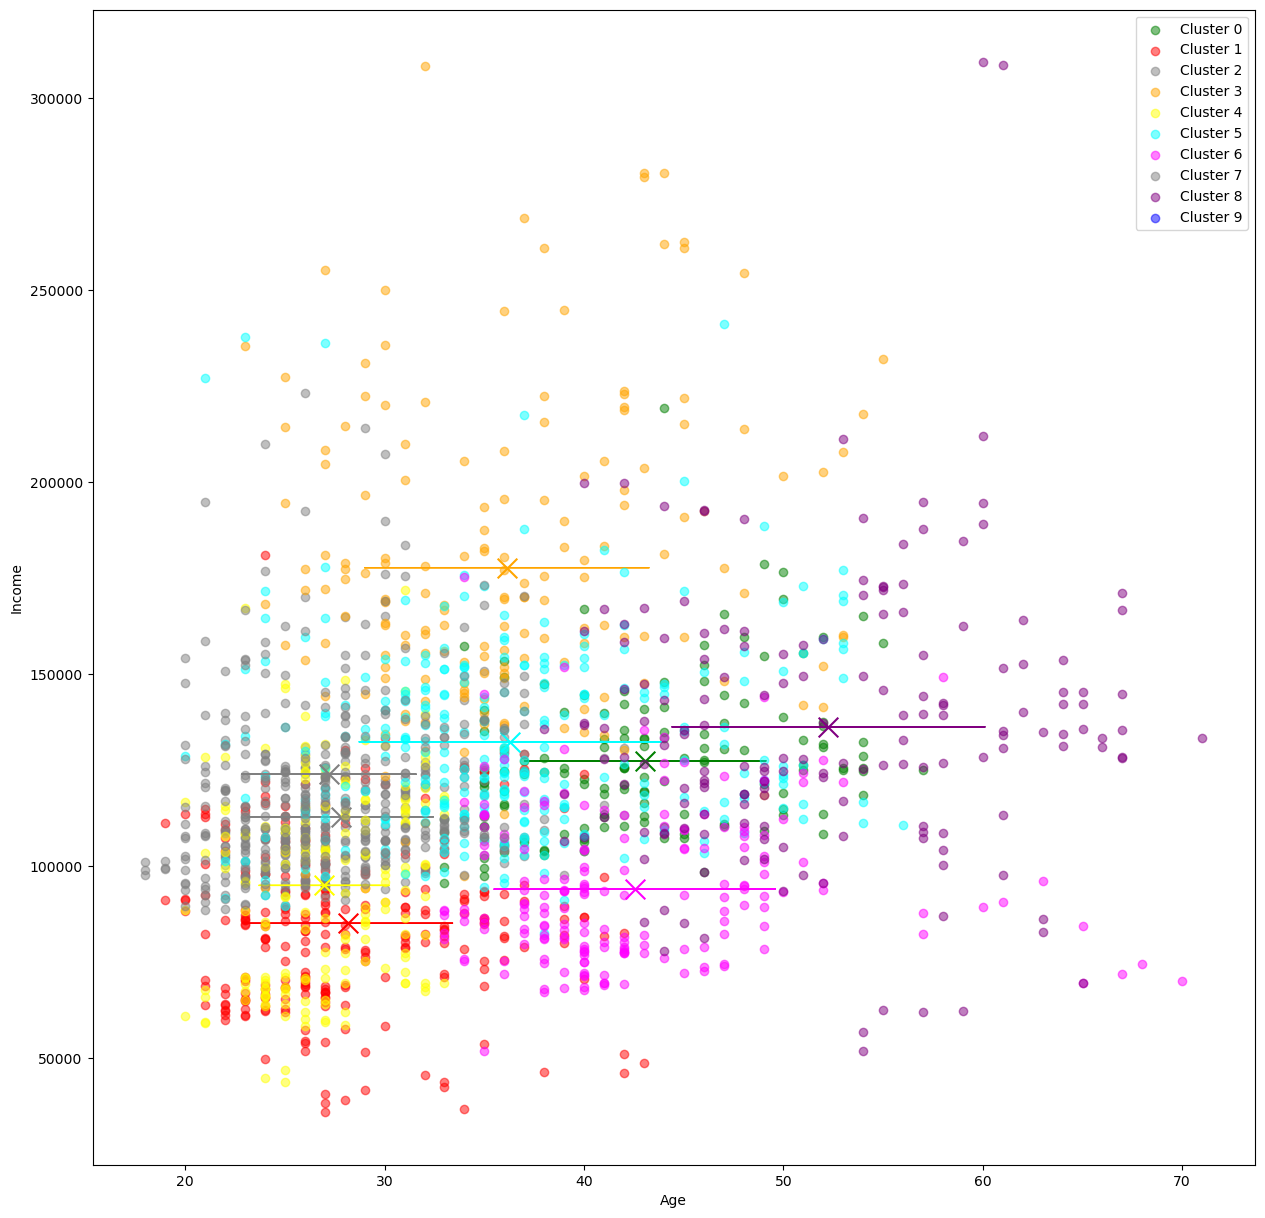

In [32]:

cluster_centers = []
for cluster_df in clusters:
    cluster_centers.append(cluster_df.mean())

plt.figure(figsize=(15, 15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, center in enumerate(cluster_centers):
    cluster_df = clusters[i]
    plt.scatter(cluster_df.Age, cluster_df['Income'], color=colors[i], alpha=0.5, label=f'Cluster {i}')
    

    plt.scatter(center['Age'], center['Income'], color=colors[i], marker='x', s=200)
    circle = plt.Circle((center['Age'], center['Income']), radius=cluster_df['Age'].std(), color=colors[i], fill=False)
    plt.gca().add_patch(circle)

plt.legend()
plt.show()
